In [1]:
# Translate "PlotAnalyticalModel2Curves_v1.m", Sam.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

In [2]:
Vmax = 7;           # Maximum gliding speed (um/s)
k = 300.0;          # Spring constant (pN/um)
fstall = -0.4;      # Stall force (pN)
frupt = -9.2;       # Rupture force (pN)
Tau1 = 0.025;       # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.

$fv = f_{stall}\times (1 - \frac{V}{V_{max}})$ <br>

$(\frac{1}{R} - 1)\times 0.5\times f_{rupt}\times \frac{\frac{f_{rupt}}{k\times \tau_1}}{(\frac{f_{rupt}}{k\times \tau_1} - V)}$

In [3]:
# Values of active motor ratio investigated
ActiveMotorRatio = np.array([0.8, 0.853721, 0.9, 0.95]);

# Gliding speed
V = np.arange(0.0,Vmax,0.1);

# f-V relation
fV = fstall*(1.0 - (V/Vmax));

# V-fimp relation
fFric = []

In [4]:
for I in range(len(ActiveMotorRatio)):
    fFric.append( (1/ActiveMotorRatio[I] - 1.0)*0.5*frupt*frupt/k/Tau1/(frupt/k/Tau1 - V) )

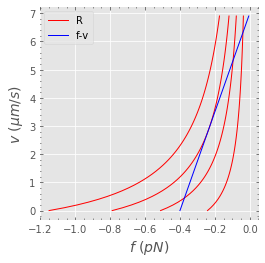

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

for I in range(len(ActiveMotorRatio)):
    if I==0:
        ax.plot(fFric[I],V,'r-', lw=1, label='R')
    else:
        ax.plot(fFric[I],V,'r-', lw=1)
ax.plot(fV,V,'b-',lw=1, label='f-v')

ax.minorticks_on()
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel('$f\ (pN)$', fontsize=14); ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)
ax.legend()

#plt.savefig('fig/impedance.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/impedance.png', format='png', dpi=700, bbox_inches='tight')
plt.show()